### Student Name: Aidan Keeshan
### Student ID: 18200117

All necessary imports are provided. Please do not add further imports.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

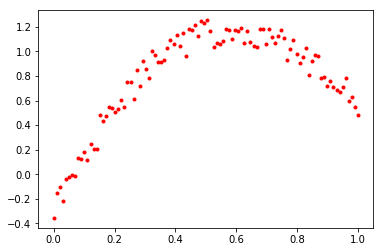

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
np.random.seed(4242) 
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
lambdas = np.logspace(-11,0,999)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9,test_size=0.1, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

ein_min_ind = np.argmin(ein)
eout_min_ind = np.argmin(eout)

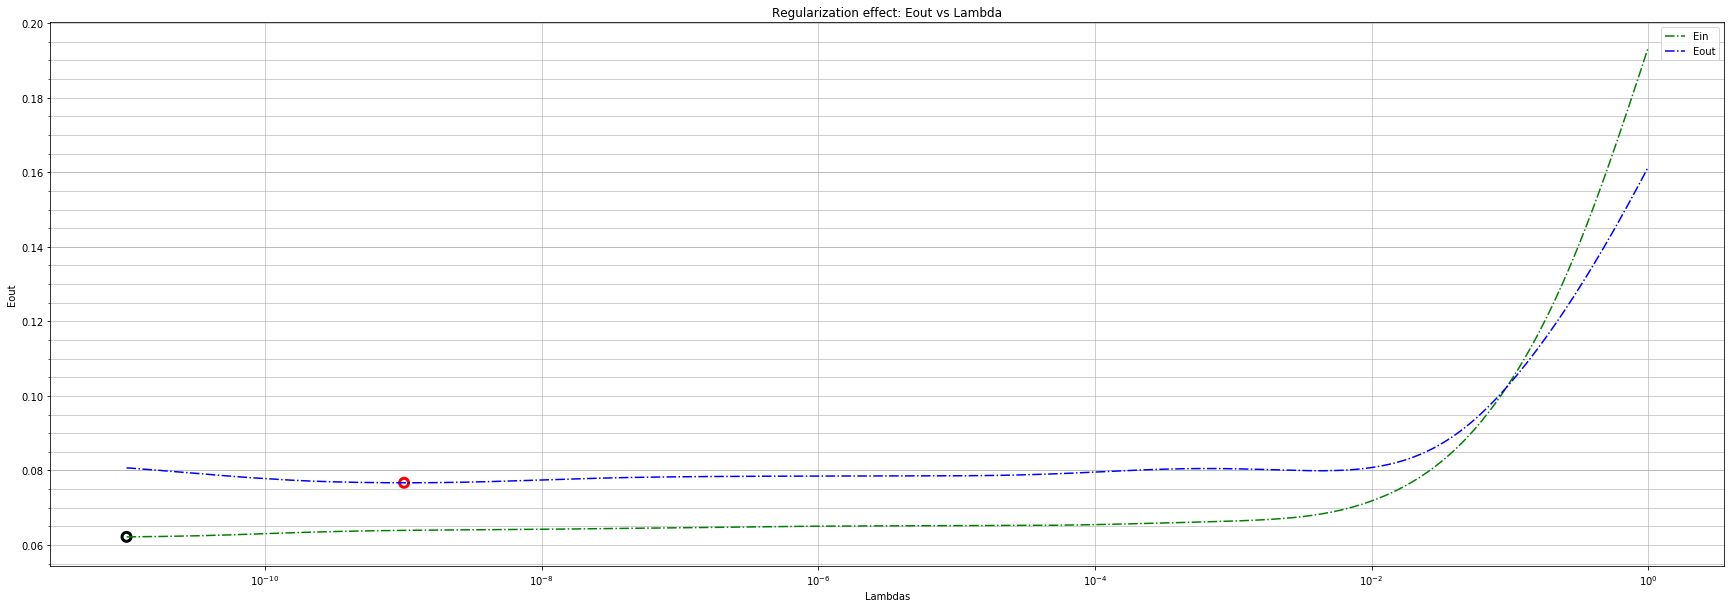

In [9]:
# Plot the Regularization parameter lambda with Eout
plt.figure(figsize=(30,10))
plt.plot(lambdas, ein,'g',linestyle='-.',label='Ein')
plt.plot(lambdas, eout,'b',linestyle='-.',label='Eout')
plt.scatter(lambdas[eout_min_ind], eout[eout_min_ind], s=80, facecolors='none', edgecolors='red',linewidth=3,)
plt.scatter(lambdas[ein_min_ind], ein[ein_min_ind], s=80, facecolors='none', edgecolors='black',linewidth=3,)
plt.title('Regularization effect: Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.xscale('log')
plt.grid(alpha=0.75,which="both",ls="-")
plt.minorticks_on()
plt.legend()
plt.show()

In [10]:
def fit_data(X_train,X_test,y_train,y_test,l):
    w = weights_reg(X_train,y_train,l)
    yhat = lin_reg(w,X_trans)
    eout = calc_error(w,X_test,y_test)
    return yhat,eout

y_hat_zero,eout_zero = fit_data(X_train,X_test,y_train,y_test,0)
y_hat_ein_min,eout_ein_min = fit_data(X_train,X_test,y_train,y_test,lambdas[ein_min_ind])
y_hat_one,eout_one = fit_data(X_train,X_test,y_train,y_test,1)

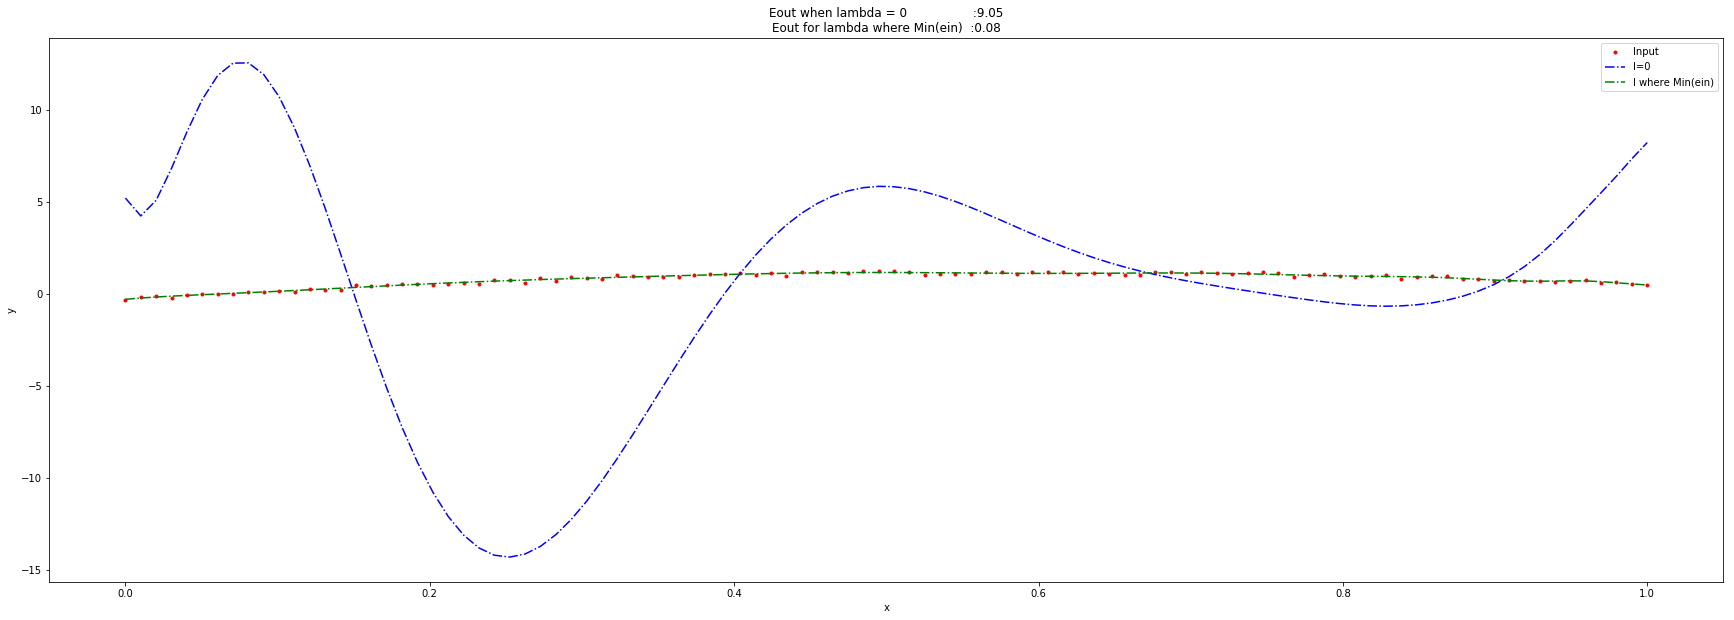

In [11]:
plt.figure(figsize=(30,10))
plt.plot(X,y,'r.',label='Input')
plt.plot(X,y_hat_zero,'b-.',label='l=0')
plt.plot(X,y_hat_ein_min,'g-.',label='l where Min(ein)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Eout when lambda = 0                 :{:.2f}\nEout for lambda where Min(ein)  :{:.2f}".format(eout_zero,eout_ein_min))
plt.show()

In [12]:
def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))
points = 1000
domain = np.linspace(0, 20, points)
actv = (sigmoid(domain)-0.5)*2

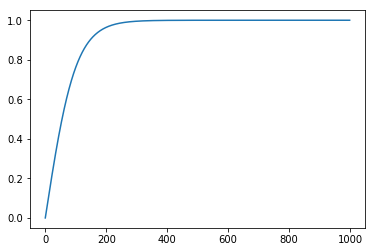

In [13]:
plt.plot(actv)
plt.show()

In [14]:
ein_domain = []
eout_domain = []

for l in actv:    
    w = weights_reg(X_train,y_train,l)
    ein_domain.append(calc_error(w,X_train,y_train))
    eout_domain.append(calc_error(w,X_test,y_test))

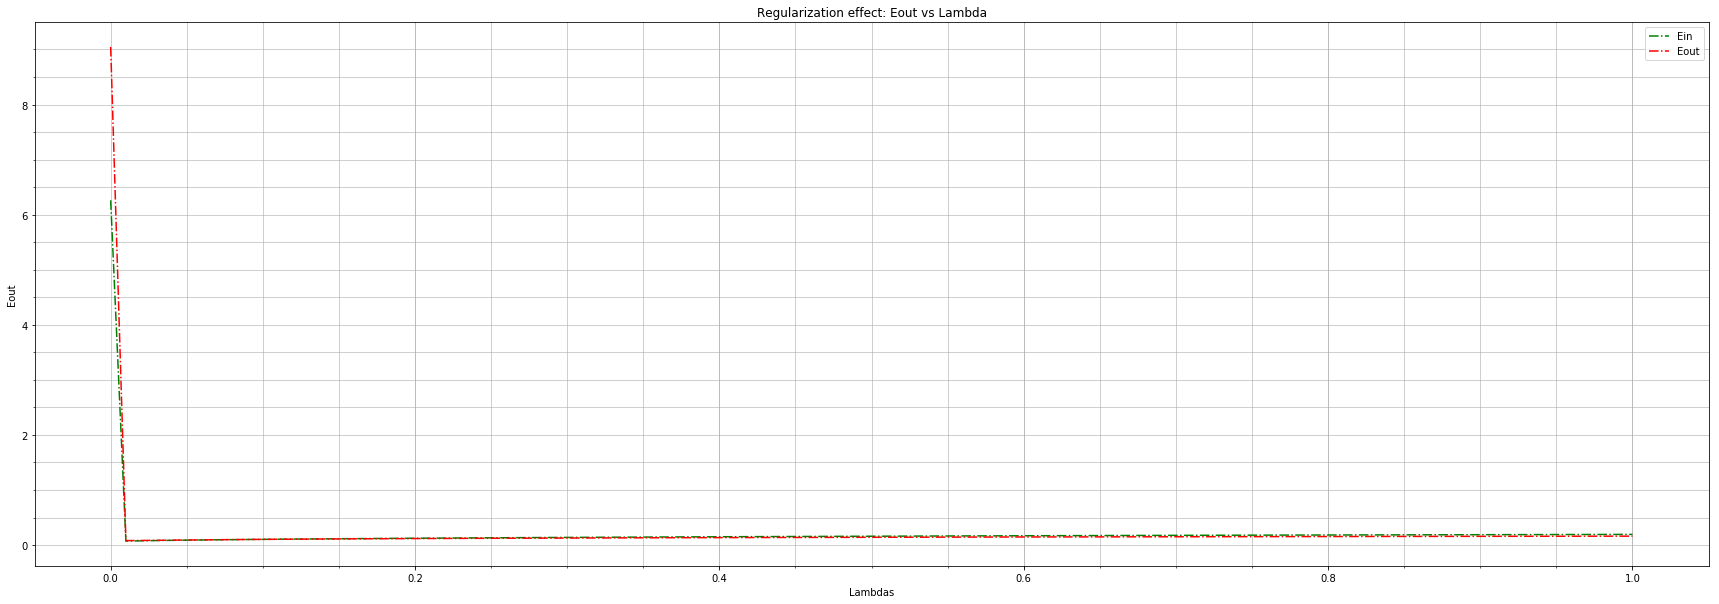

In [15]:
plt.figure(figsize=(30,10))
plt.plot(actv, ein_domain,'g',linestyle='-.',label='Ein')
plt.plot(actv, eout_domain,'r',linestyle='-.',label='Eout')
plt.title('Regularization effect: Eout vs Lambda')
plt.xlabel('Lambdas')
plt.ylabel('Eout')
plt.grid(alpha=0.75,which="both",ls="-")
plt.minorticks_on()
plt.legend()
plt.show()

In [16]:
def subplot(y_hat,lable,title):
    plt.figure(figsize=(30,10))
    plt.plot(X,y,'r.',label='Input')
    plt.plot(X,y_hat,'b-.',label=lable)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(title)
    plt.show()

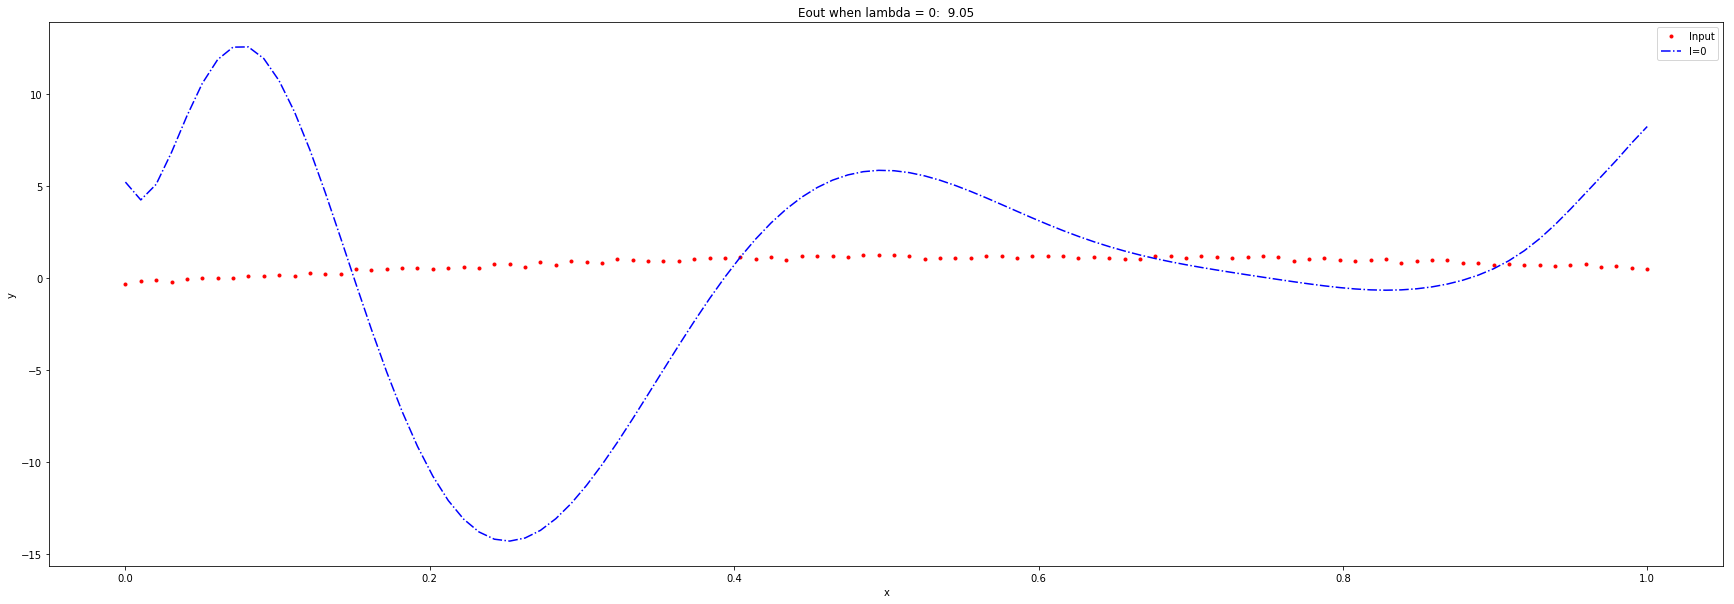

In [17]:
subplot(y_hat_zero,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_zero))

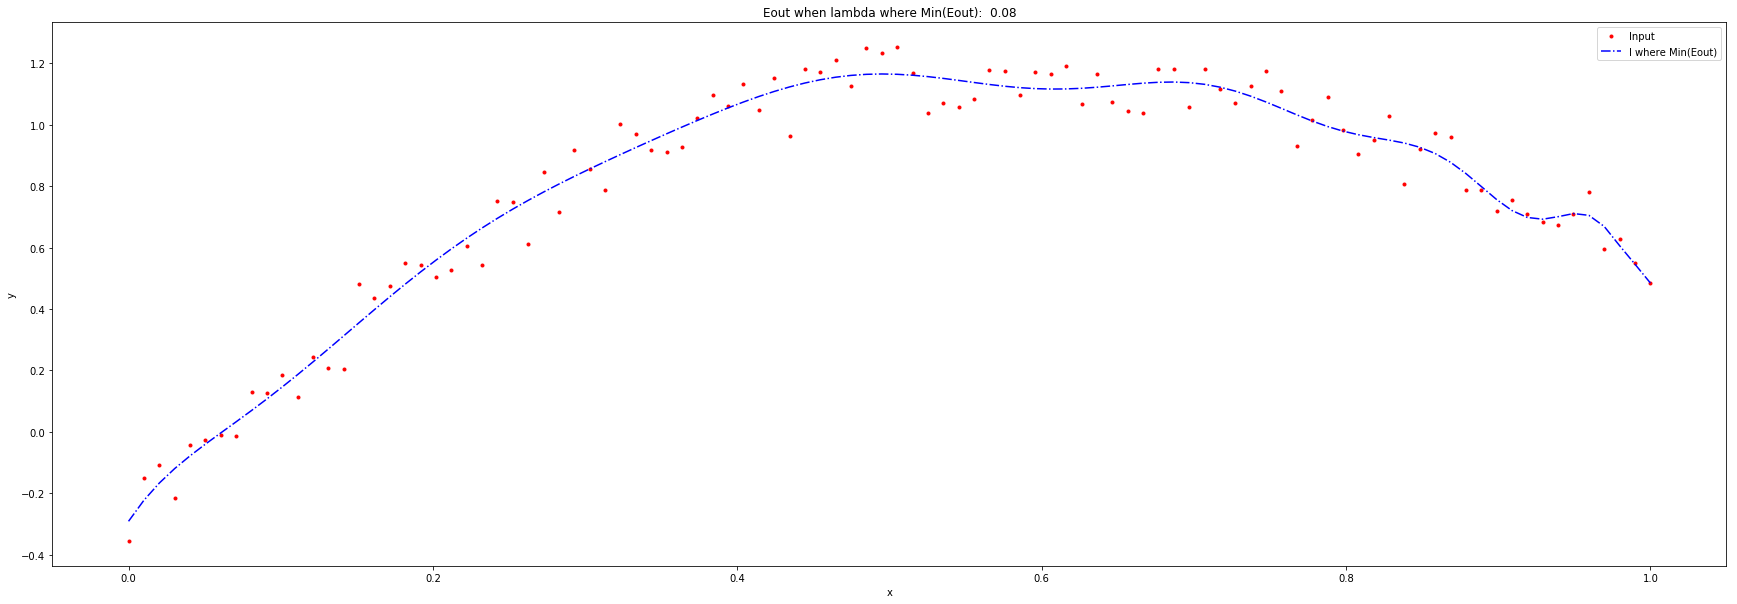

In [18]:
subplot(y_hat_ein_min,"l where Min(Eout)","Eout when lambda where Min(Eout):  {:.2f}".format(eout_ein_min))

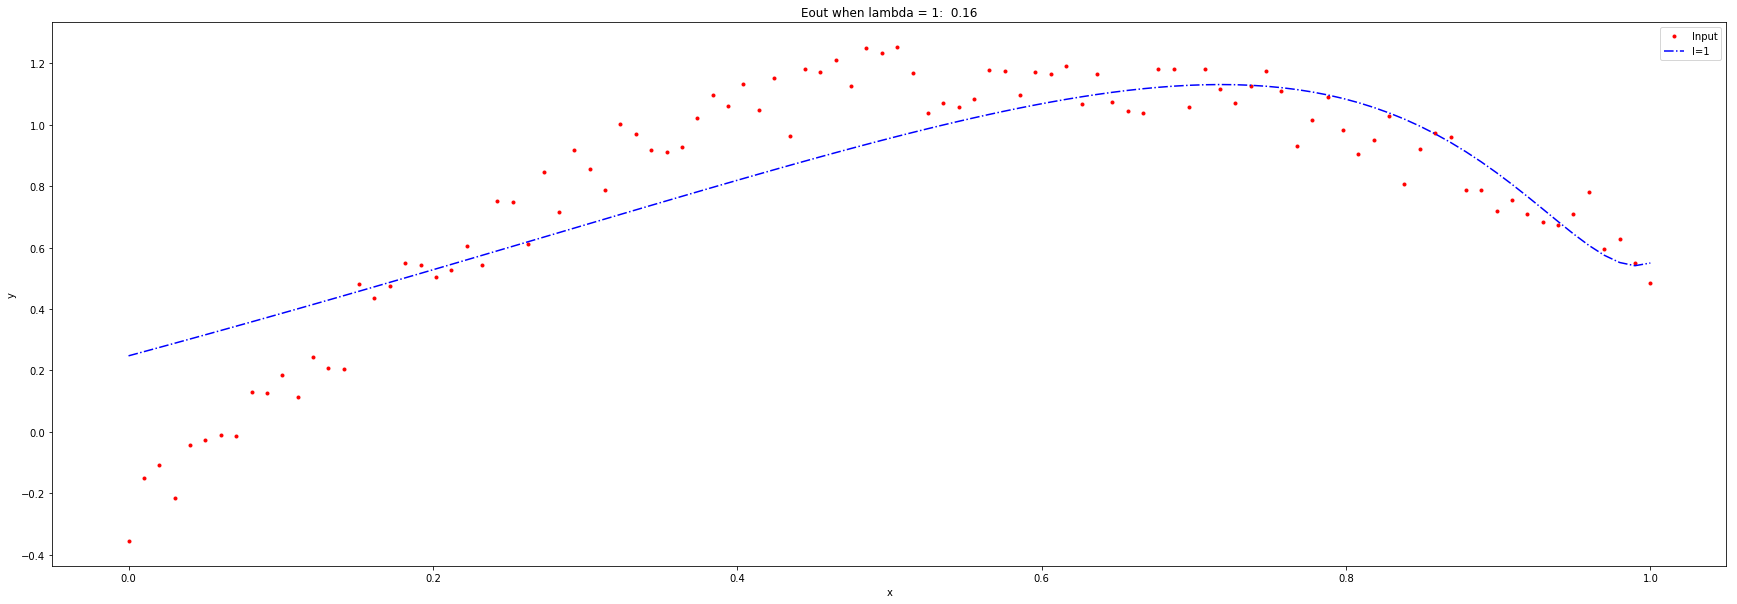

In [19]:
subplot(y_hat_one,"l=1","Eout when lambda = 1:  {:.2f}".format(eout_one))

## Task 5 (CE6002)

Use the code from Task 4 and perform the same analysis using 10-fold cross-validation.    
Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD.    
Note that the data set provided is ordered by increasing X.  

Full implementation of 10-fold CV yielding valid lambda and Eout.   

Full implementation of 10-fold CV yielding valid lamda, Eout and plots of over/under/optimal fitting.   

In [20]:
ein=[]
eout=[]
weights=[]
lambdas = np.logspace(-11,0,999)
k = 10
k_fold = KFold(n_splits=k, shuffle=True, random_state=5) 


X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.8,test_size=0.2, random_state =5)

ein = np.zeros((len(lambdas),k+1))
eout = np.zeros((len(lambdas),k+1))
j = 1
for train_ind,test_ind in k_fold.split(X_train):
    kf_X_train,kf_y_train  = X_train[train_ind], y_train[train_ind]
    kf_X_test,kf_y_test = X_train[test_ind],y_train[test_ind]
    for i, l in enumerate(lambdas):
        w = weights_reg(X_train,y_train,l)
        ein[i,j] = calc_error(w,kf_X_train,kf_y_train)
        eout[i,j] = calc_error(w,kf_X_test,kf_y_test)
    j += 1


ein[:,0] = ein[:,1:10].mean(axis=1)
kf_ein_min_ind = np.argmin(ein[:,0])
kf_ein_min = ein[kf_ein_min_ind,0]

eout[:,0] = eout[:,1:10].mean(axis=1)


kf_eout_min_ind = np.argmin(eout[:,0])
kf_eout_min = ein[kf_eout_min_ind,0]

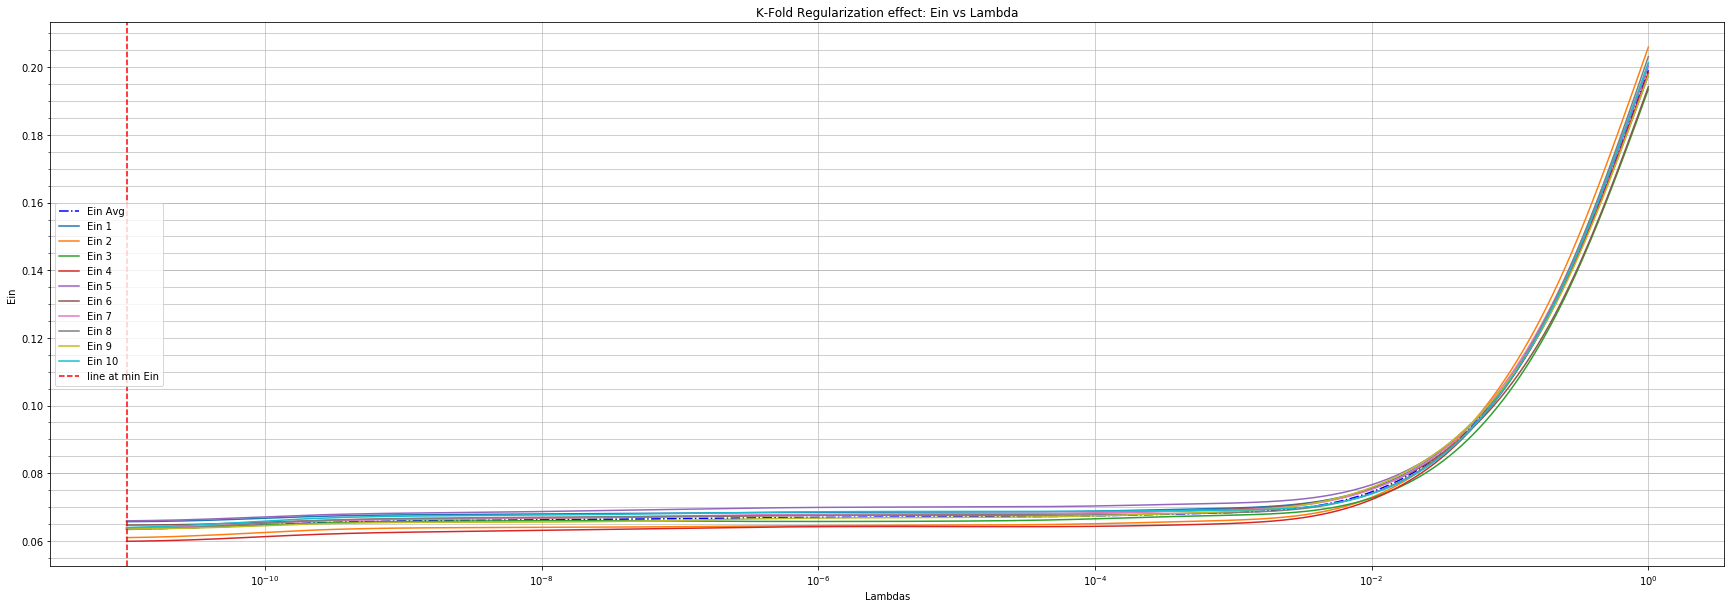

In [21]:
def plot_k_fold(typ,e_series,e_min):
    plt.figure(figsize=(30,10))
    for i in range(0,11):
        if i == 0:
            plt.plot(lambdas, e_series[:,0],'b',linestyle='-.',label=typ+' Avg')
        else:
            plt.plot(lambdas, e_series[:,i],label=typ+' '+str(i))
    plt.axvline(x=lambdas[e_min], label='line at min '+typ, c='r', ls='--', lw=1.5)
    plt.title('K-Fold Regularization effect: '+typ+' vs Lambda')
    plt.xlabel('Lambdas')
    plt.ylabel(typ)
    plt.xscale('log')
    plt.grid(alpha=0.75,which="both",ls="-")
    plt.minorticks_on()
    plt.legend(loc=6)
    plt.show()
plot_k_fold('Ein',ein,kf_ein_min_ind)

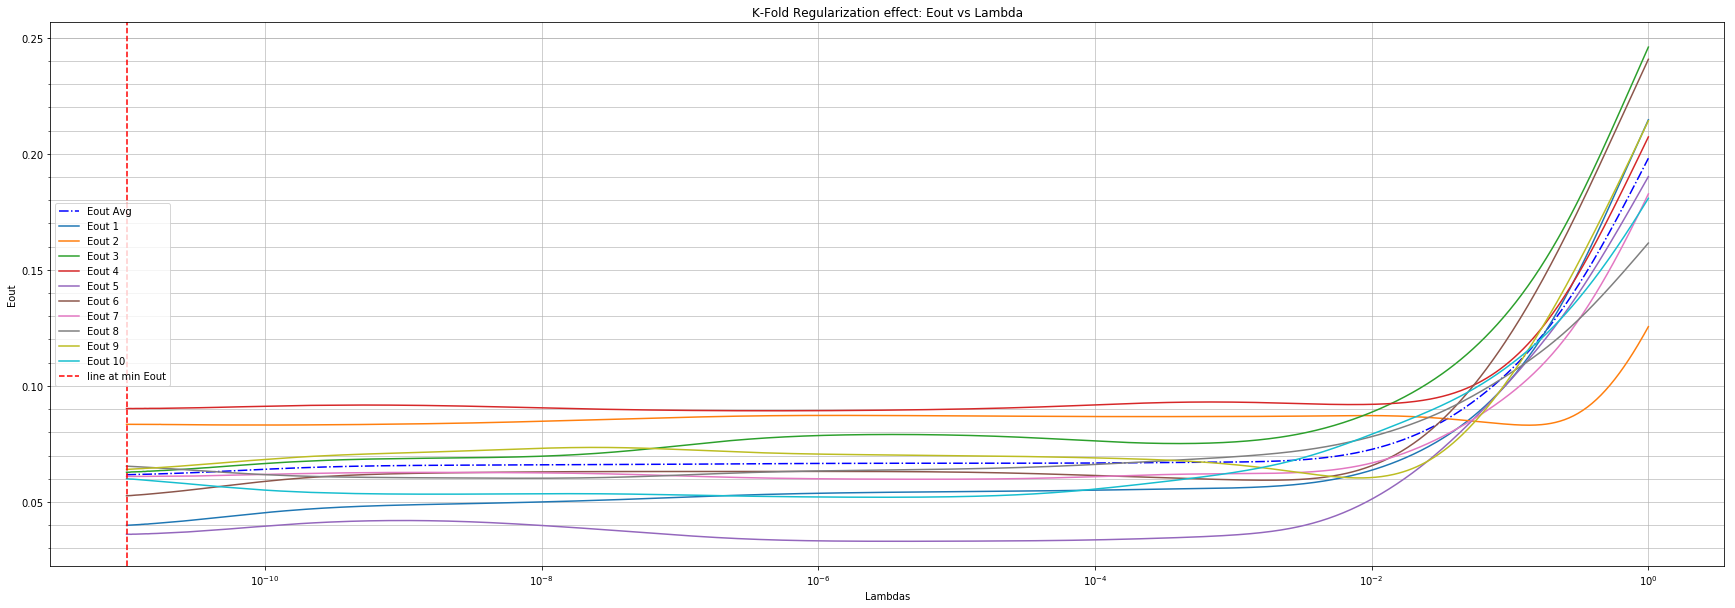

In [22]:
plot_k_fold('Eout',eout,kf_eout_min_ind)

In [23]:
y_hat_zero,eout_zero = fit_data(X_train,X_test,y_train,y_test,0)
y_hat_ein_min,eout_ein_min = fit_data(X_train,X_test,y_train,y_test,lambdas[kf_ein_min_ind])
y_hat_one,eout_one = fit_data(X_train,X_test,y_train,y_test,1)

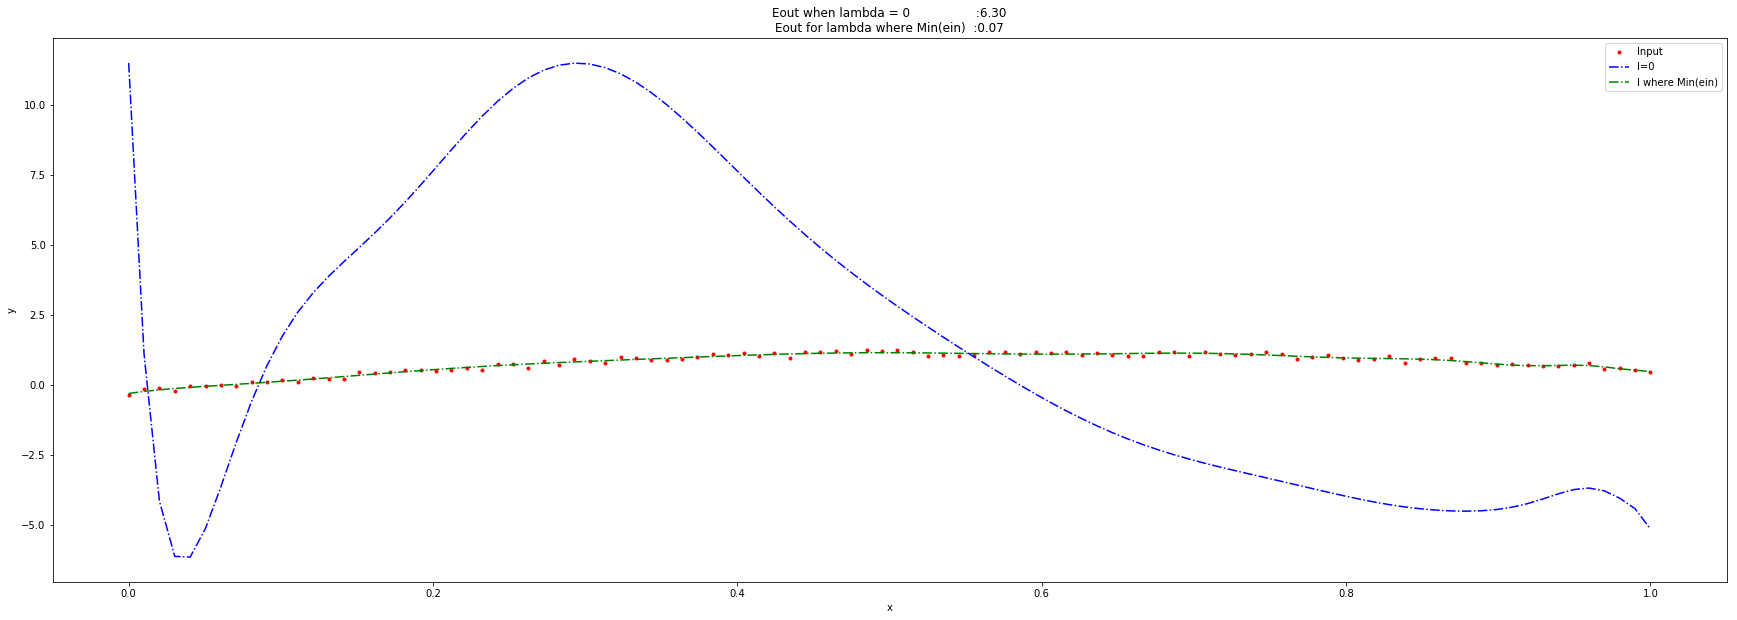

In [24]:
plt.figure(figsize=(30,10))
plt.plot(X,y,'r.',label='Input')
plt.plot(X,y_hat_zero,'b-.',label='l=0')
plt.plot(X,y_hat_ein_min,'g-.',label='l where Min(ein)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Eout when lambda = 0                 :{:.2f}\nEout for lambda where Min(ein)  :{:.2f}".format(eout_zero,eout_ein_min))
plt.show()

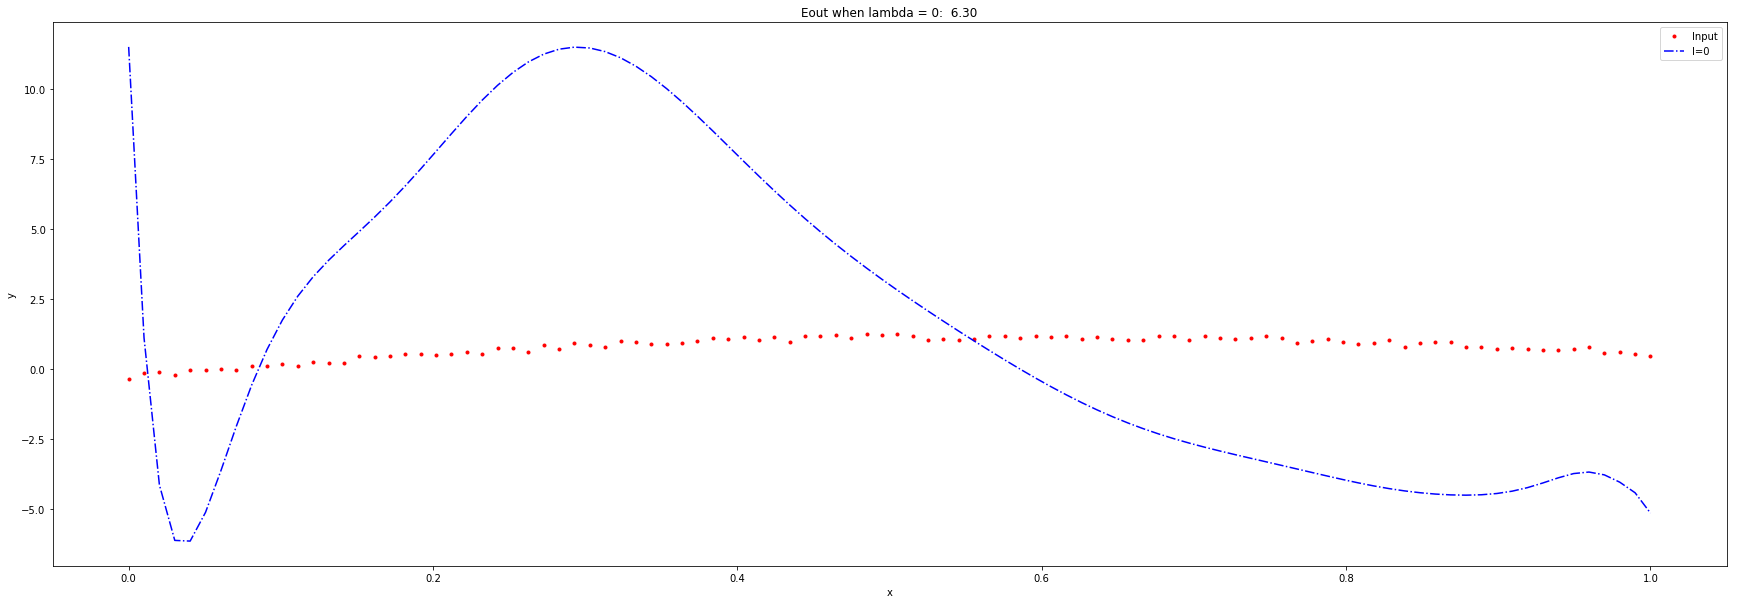

In [25]:
subplot(y_hat_zero,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_zero))

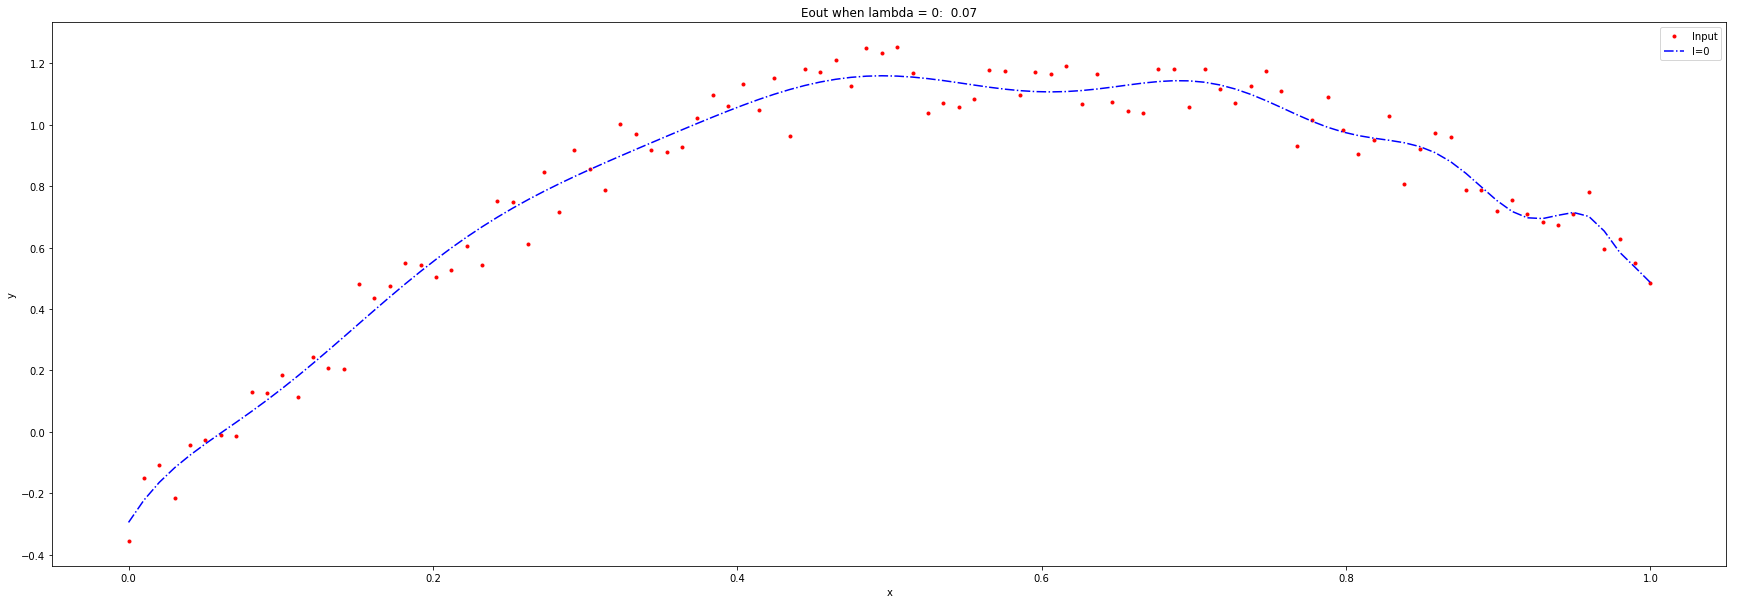

In [26]:
subplot(y_hat_ein_min,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_ein_min))

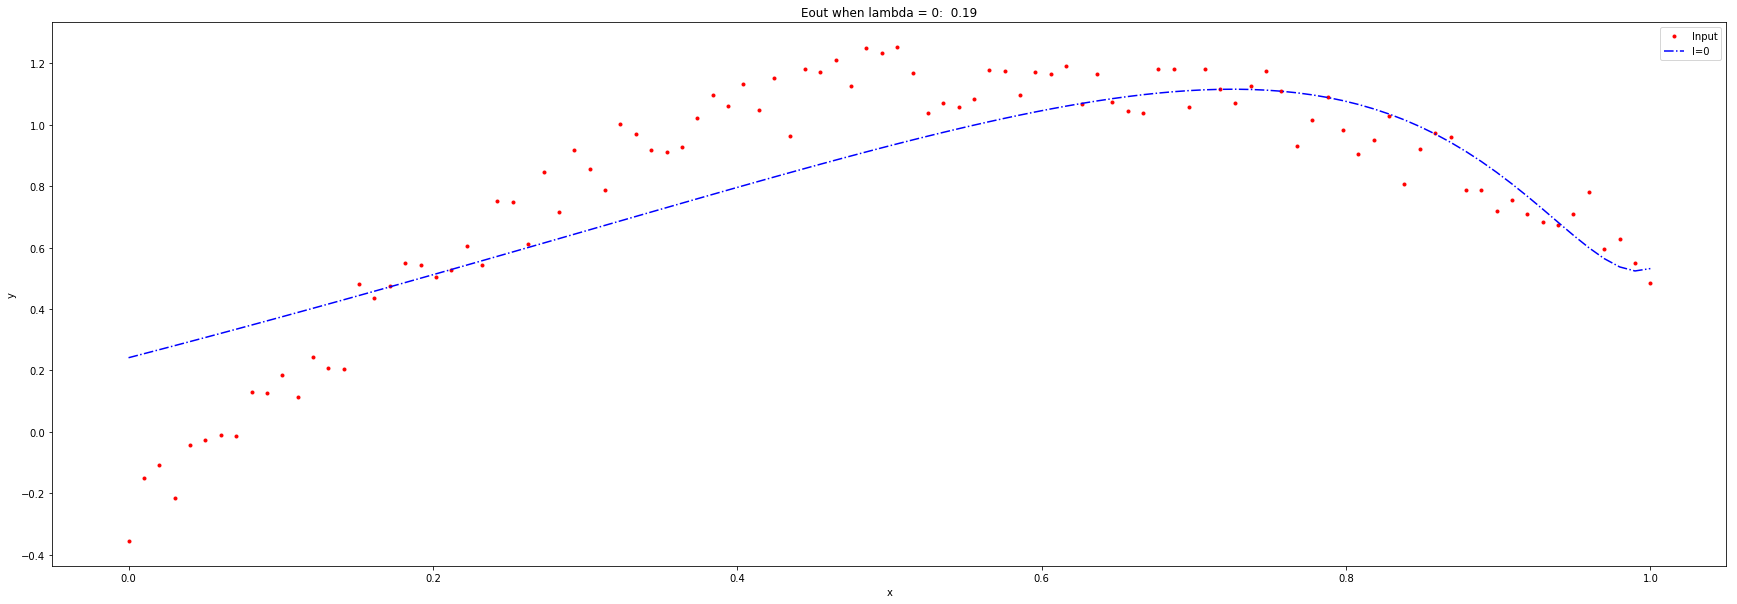

In [27]:
subplot(y_hat_one,"l=0","Eout when lambda = 0:  {:.2f}".format(eout_one))